In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_addons as tfa

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-weather-data/testset.csv


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/kaggle/input/delhi-weather-data/testset.csv',index_col=False)

In [41]:
data[' _rain'].sum()

2652

In [42]:
data.sample(10)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
94355,20160411-15:00,Haze,16.0,0,0,NaN,32.0,NaN,1008.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,11.1
25694,20010426-06:30,Haze,14.0,0,0,39.7,21.0,NaN,1005.0,0,0,40.0,0,0,3.0,270.0,West,NaN,NaN,11.1
7297,19971107-21:40,Shallow Fog,16.0,1,0,NaN,94.0,NaN,1017.0,0,0,17.0,0,0,0.5,0.0,North,NaN,NaN,0.0
29448,20011005-16:30,Smoke,23.0,0,0,31.2,74.0,NaN,1006.0,0,0,28.0,0,0,1.4,0.0,North,NaN,NaN,0.0
87047,20140103-12:00,Haze,10.0,0,0,NaN,55.0,NaN,1016.0,0,0,17.0,0,0,2.0,250.0,WSW,NaN,NaN,3.7
29942,20011028-06:30,Smoke,16.0,0,0,31.9,38.0,NaN,1013.0,0,0,32.0,0,0,3.0,200.0,SSW,NaN,NaN,5.6
15465,19990918-00:30,Haze,19.0,0,0,30.3,55.0,NaN,1003.0,0,0,29.0,0,0,2.8,230.0,SW,NaN,NaN,7.4
46015,20030723-14:00,Haze,25.0,0,0,41.8,59.0,NaN,997.0,0,0,34.0,0,0,3.5,0.0,North,NaN,NaN,0.0
78738,20101001-03:00,Mist,22.0,0,0,NaN,80.0,NaN,1010.0,0,0,25.0,0,0,2.0,NaN,NaN,NaN,NaN,0.0
11656,19990204-19:30,Smoke,5.0,0,0,NaN,76.0,NaN,1019.0,0,0,9.0,0,0,2.2,0.0,North,NaN,NaN,0.0


In [43]:
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [44]:
data.info()
print(data[' _rain'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [45]:
data['datetime_utc']=pd.to_datetime(data['datetime_utc'])
data.datetime_utc.sample(5)

22359   2000-12-01 20:30:00
46020   2003-07-23 16:30:00
97739   2016-10-13 07:00:00
17821   2000-01-07 14:30:00
68142   2007-01-08 15:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [46]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [47]:
data.shape

(100990, 20)

<Figure size 1800x1440 with 0 Axes>

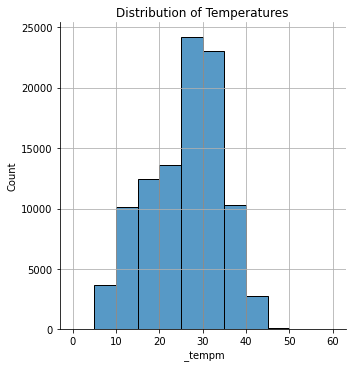

In [48]:
plt.figure(figsize=(25, 20))
sns.displot(data[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [49]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])

In [50]:
data['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

Text(0.5, 1.0, 'Scatter Plot')

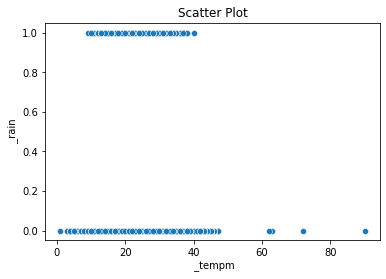

In [51]:
sns.scatterplot(x=' _tempm', y=' _rain', data=data,)
# Adding Title to the Plot
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

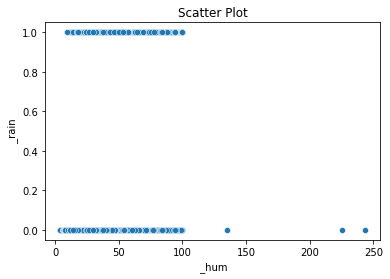

In [52]:
sns.scatterplot(x=' _hum', y=' _rain', data=data,)
# Adding Title to the Plot
plt.title("Scatter Plot")

In [53]:
data.set_index('datetime_utc', inplace= True)

In [54]:
data[' _tempm'].fillna(data[' _tempm'].mean(), inplace=True)

In [55]:
data[' _tempm'].isna().sum()

0

In [56]:
data[' _hum'].isna().sum()

757

In [57]:
data[' _hum'].fillna(data[' _hum'].mean(), inplace=True)

In [58]:
data[' _pressurem'].fillna(data[' _pressurem'].mean(), inplace=True)

Text(0.5, 1.0, 'Scatter Plot')

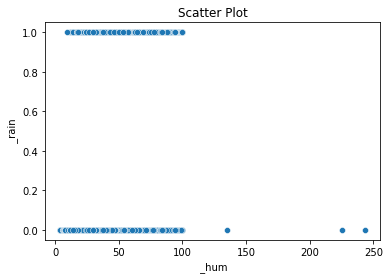

In [59]:
sns.scatterplot(x=' _hum', y=' _rain', data=data,)
# Adding Title to the Plot
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

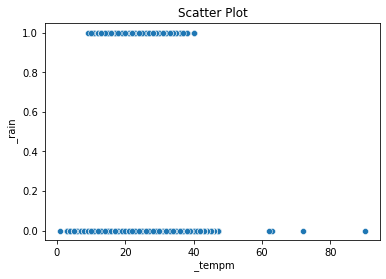

In [61]:
sns.scatterplot(x=' _tempm', y=' _rain', data=data,)
# Adding Title to the Plot
plt.title("Scatter Plot")

In [19]:
data[' _pressurem'].isna().sum()

0

In [20]:
data[data[' _pressurem'] < 0] = 0

In [21]:
data =data.resample('D').mean() # CULPRIT

Text(0.5, 1.0, 'Scatter Plot')

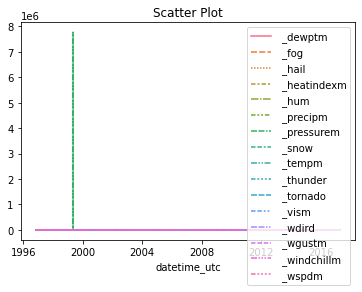

Text(0.5, 1.0, 'Spearman Correlation')

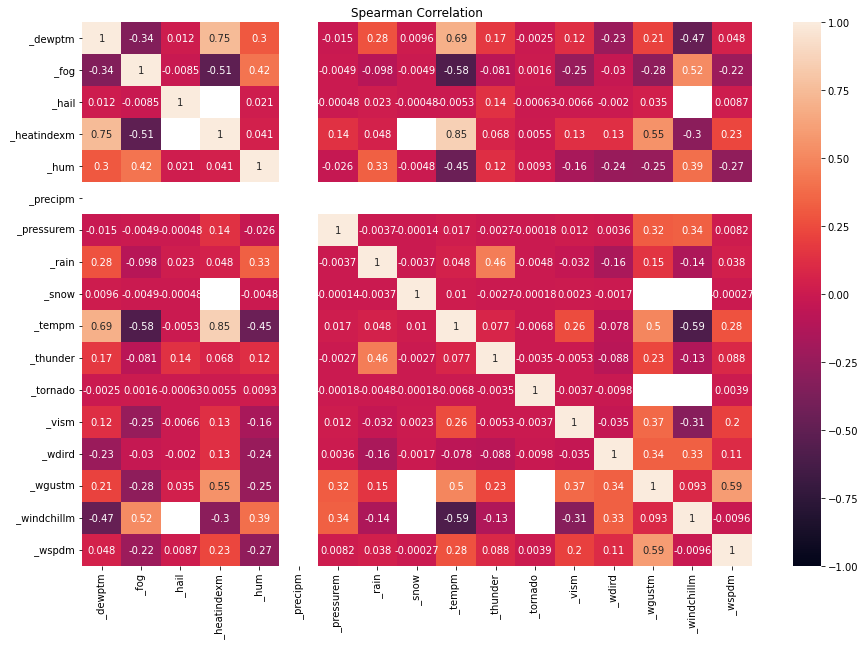

In [23]:
cormat=data.corr(method="spearman")
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(data.corr(), vmin=-1, 
                      vmax=1, annot=True)
plt.title("Spearman Correlation")

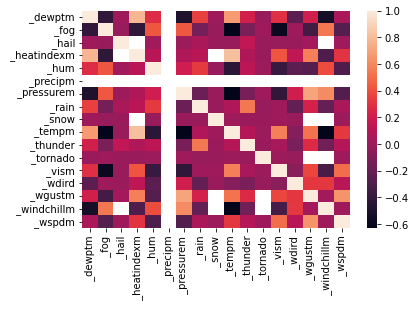

In [24]:
sns.heatmap(cormat);

In [25]:
data.head(10)

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,
1996-11-01,7.750000,0.0,0.0,0.0,35.916667,0.0,673.333333,0.0,0.0,14.666667,0.0,0.0,1.125000,23.333333,0.0,0.0,1.057143
1996-11-02,10.458333,0.0,0.0,NaN,48.625000,NaN,1009.833333,0.0,0.0,22.916667,0.0,0.0,3.476190,106.666667,NaN,NaN,8.028571
1996-11-03,12.041667,0.0,0.0,26.8,55.958333,NaN,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.286364,106.666667,NaN,NaN,4.804545
1996-11-04,10.222222,0.0,0.0,27.5,48.055556,NaN,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.326667,55.555556,NaN,NaN,1.964706
1996-11-05,8.200000,0.0,0.0,NaN,29.400000,NaN,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,NaN,NaN,10.020000
1996-11-06,9.062500,0.0,0.0,NaN,47.875000,NaN,1011.812500,0.0,0.0,21.937500,0.0,0.0,3.290909,94.375000,NaN,NaN,6.072727
1996-11-07,9.458333,0.0,0.0,NaN,48.000000,NaN,1013.416667,0.0,0.0,21.750000,0.0,0.0,2.734783,117.916667,NaN,NaN,3.395652
1996-11-08,8.130435,0.0,0.0,NaN,45.746228,NaN,1014.708333,0.0,0.0,21.435470,0.0,0.0,2.709091,87.083333,NaN,NaN,2.325000
1996-11-09,7.772727,0.0,0.0,NaN,47.181818,NaN,1013.863636,0.0,0.0,19.909091,0.0,0.0,2.868421,117.272727,NaN,NaN,4.978947


In [26]:
data = data.drop([' _precipm'],axis=1)
data = data.drop([' _dewptm',' _fog',' _hail',' _heatindexm',' _snow',' _thunder',' _tornado',' _vism',' _wdird',' _wgustm',' _windchillm',' _wspdm'],axis=1)

In [27]:
data.head(20)

,_hum,_pressurem,_rain,_tempm
datetime_utc,,,,
1996-11-01,35.916667,673.333333,0.0,14.666667
1996-11-02,48.625000,1009.833333,0.0,22.916667
1996-11-03,55.958333,1010.500000,0.0,21.791667
1996-11-04,48.055556,1011.333333,0.0,22.722222
1996-11-05,29.400000,1011.800000,0.0,27.800000
1996-11-06,47.875000,1011.812500,0.0,21.937500
1996-11-07,48.000000,1013.416667,0.0,21.750000
1996-11-08,45.746228,1014.708333,0.0,21.435470
1996-11-09,47.181818,1013.863636,0.0,19.909091


In [28]:
data = data[[' _hum', ' _tempm',' _rain']]

In [29]:
data.head(20)

,_hum,_tempm,_rain
datetime_utc,,,
1996-11-01,35.916667,14.666667,0.0
1996-11-02,48.625000,22.916667,0.0
1996-11-03,55.958333,21.791667,0.0
1996-11-04,48.055556,22.722222,0.0
1996-11-05,29.400000,27.800000,0.0
1996-11-06,47.875000,21.937500,0.0
1996-11-07,48.000000,21.750000,0.0
1996-11-08,45.746228,21.435470,0.0
1996-11-09,47.181818,19.909091,0.0


In [30]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7480 entries, 1996-11-01 to 2017-04-24
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _hum    7339 non-null   float64
 1    _tempm  7339 non-null   float64
 2    _rain   7339 non-null   float64
dtypes: float64(3)
memory usage: 233.8 KB


 _hum      141
 _tempm    141
 _rain     141
dtype: int64

In [31]:
data = data.dropna()
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7339 entries, 1996-11-01 to 2017-04-24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    _hum    7339 non-null   float64
 1    _tempm  7339 non-null   float64
 2    _rain   7339 non-null   float64
dtypes: float64(3)
memory usage: 229.3 KB


 _hum      0
 _tempm    0
 _rain     0
dtype: int64

array([<AxesSubplot:xlabel='datetime_utc'>,
       <AxesSubplot:xlabel='datetime_utc'>,
       <AxesSubplot:xlabel='datetime_utc'>], dtype=object)

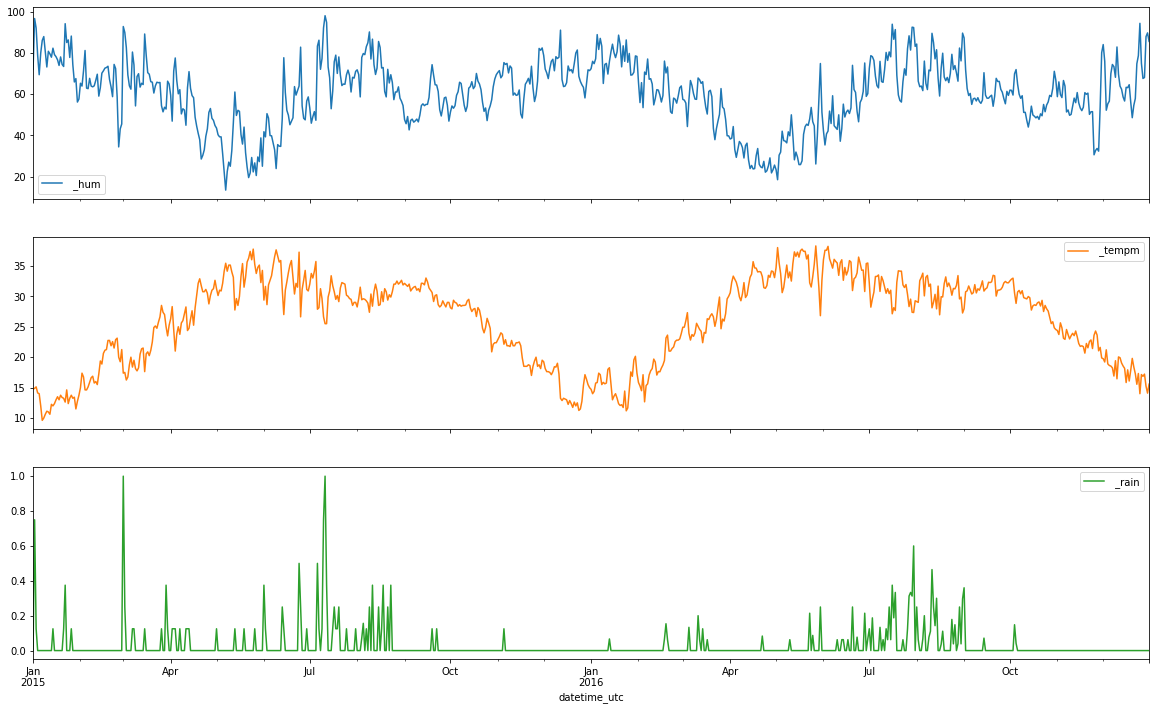

In [32]:
data['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [33]:
data_np=data.to_numpy()
inp_data=np.zeros((data_np.shape[0],2))
out_data=np.zeros(data_np.shape[0])
for i in range(0,data_np.shape[0]):
    inp_data[i]=np.array([data_np[i][0],data_np[i][1]])
    if data_np[i][2] > 0:
        out_data[i] = 1 # That day has rain
    else:
        out_data[i] = 0 # That day has no rain
print(inp_data.shape,out_data.shape)


(7339, 2) (7339,)


In [34]:
print(out_data.sum())

1124.0


In [35]:
inp_data

array([[35.91666667, 14.66666667],
       [48.625     , 22.91666667],
       [55.95833333, 21.79166667],
       ...,
       [40.9       , 32.9       ],
       [27.5       , 32.875     ],
       [27.14285714, 32.        ]])

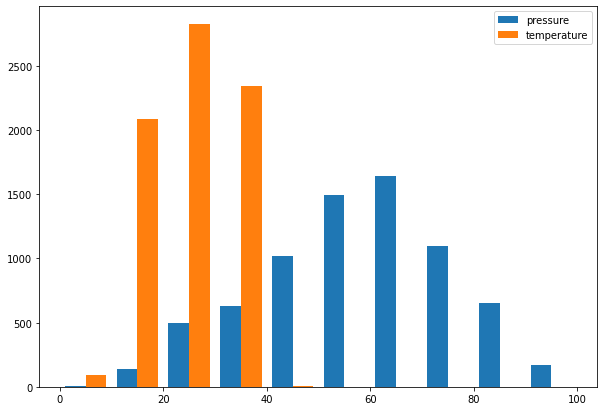

In [36]:
fig, ax = plt.subplots(figsize =(10, 7))
colors = ['red', 'tan', 'lime']
ax.hist(inp_data, bins = [0,10,20,30,40,50,60,70,80,90,100],label=colors)
plt.legend(["pressure","temperature"])
 
# Show plot
plt.show()

In [37]:
df1=pd.DataFrame(inp_data)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
inp_scaled = scalar.fit_transform(inp_data)
#out_scaled = scalar.fit_transform(out_data)
out_scaled = out_data


In [39]:
print(inp_scaled,out_scaled)


[[-0.28166667 -0.28820775]
 [-0.0275      0.11217539]
 [ 0.11916667  0.05757769]
 ...
 [-0.182       0.59667944]
 [-0.45        0.59546616]
 [-0.45714286  0.55300128]] [0. 0. 0. ... 0. 0. 0.]


In [40]:
out_scaled

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
print(inp_scaled.shape,out_scaled.shape)

(7339, 2) (7339,)


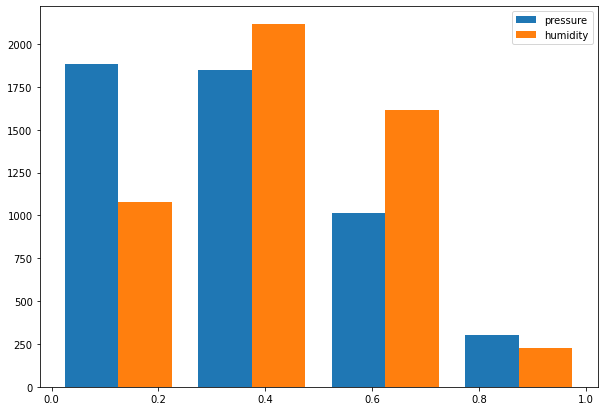

In [42]:
fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(inp_scaled, bins = [0,0.25,0.50,0.75,1.0])
plt.legend(["pressure","humidity","temperature"])
 
# Show plot
plt.show()

In [43]:
steps = 30
inp = []
out = []
for i in range(inp_scaled.shape[0]- (steps)):
    inp.append(inp_scaled[i:i+steps])
    out.append(out_scaled[i+steps])

In [44]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)
print(inp.shape, out.shape)

(7309, 30, 2) (7309,)


Text(0, 0.5, 'Frequency of Rain and no rain')

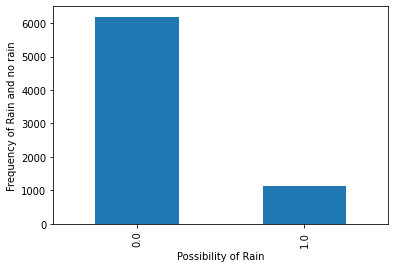

In [45]:
df=pd.DataFrame(out)
df.columns = ['_Rain']
df.pivot_table(index='_Rain', aggfunc='size').plot(kind='bar')
plt.xlabel('Possibility of Rain');
plt.ylabel('Frequency of Rain and no rain')

In [46]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=14)
inp,out=sm.fit_resample(inp.reshape(-1, 30*2),out)
inp = inp.reshape(-1, 30, 2)

print(inp.shape, out.shape, out.sum())

(12370, 30, 2) (12370,) 6185.0


Text(0, 0.5, 'Frequency of Rain and no rain')

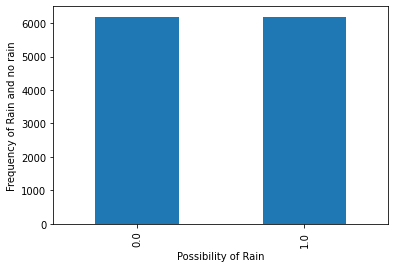

In [47]:
df=pd.DataFrame(out)
df.columns = ['_Rain']
df.pivot_table(index='_Rain', aggfunc='size').plot(kind='bar')
plt.xlabel('Possibility of Rain');
plt.ylabel('Frequency of Rain and no rain')

In [48]:
out = np.array(tf.one_hot(out.reshape(-1), 2))
print(out.shape)     

2022-10-10 13:19:23.422602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


(12370, 2)


2022-10-10 13:19:23.514326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 13:19:23.515141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-10 13:19:23.519714: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 13:19:23.520830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [49]:
"""x_train = inp[:7200,:,:]
x_test = inp[7200:,:,:]    
y_train = out[:7200]    
y_test= out[7200:]
print(inp.shape,out.shape)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, out, test_size=0.15, random_state=14)
x_train,x_val,y_train,y_val=train_test_split(inp,out,test_size=0.15,random_state=14)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(10514, 30, 2) (10514, 2) (1856, 30, 2) (1856, 2)


In [50]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 256)           1280      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 128)           65664     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 14, 100)           91600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 14, 100)           80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 100)          

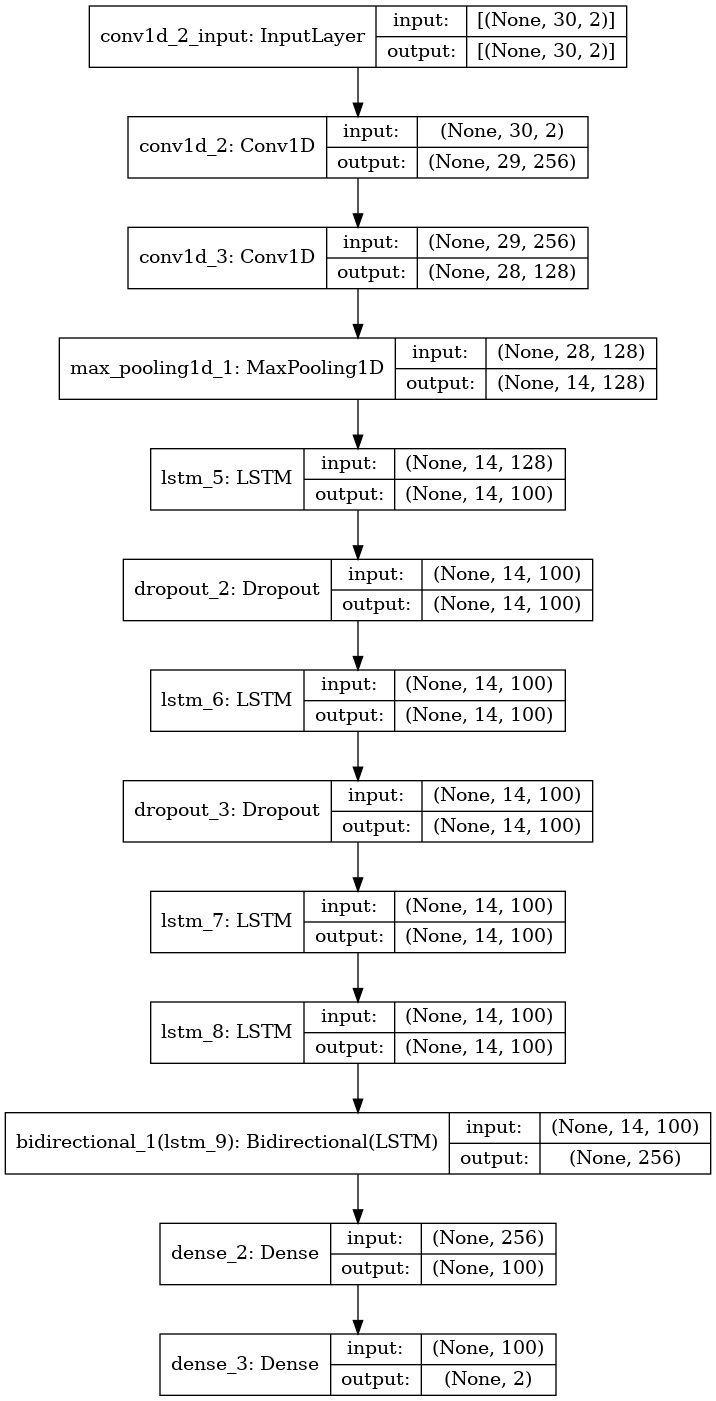

In [52]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'), 
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=2)]

early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
ADAM = Adam(learning_rate=0.001)
#rms=tf.keras.optimizers.RMSprop(learning_rate=0.001)

model = Sequential()

model.add(Conv1D(filters=256, kernel_size=2, activation='relu',input_shape=(30,2)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
#model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu',input_shape=(30,2)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='mse', optimizer=ADAM, metrics=METRICS)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='loss')
history = model.fit(x_train,y_train,epochs=1000, verbose=1,validation_data=(x_val, y_val),callbacks = [early_stop,model_checkpoint])

In [ ]:
model.save("./regressor.hdf5")
#model = tf.keras.models.load_model('best_model.h5')

In [ ]:
predict = model.predict(x_test)
#y_test.shape

In [ ]:
y_test.shape

In [ ]:
predict.shape

In [ ]:
y_test.ravel()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
model_fpr, model_tpr, threshold=roc_curve(y_test.ravel(), predict.ravel())
auc_model=auc(model_fpr,model_tpr)

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(model_fpr, model_tpr,linestyle='-',label='Logistic(auc %0.3f)' % auc_model)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')

In [ ]:
ytestlabel = tf.argmax(y_test, axis = 1)
ypredictlabel = tf.argmax(predict, axis = 1)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytestlabel, ypredictlabel)
f = sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
y_score = model.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test.ravel(), y_score.ravel())

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
#predict = scalar.inverse_transform(predict)

In [ ]:
#Ytesting = scalar.inverse_transform(y_test)
#Ytesting = y_test

In [ ]:
# plt.figure(figsize=(20,9))
# plt.plot(Ytesting , 'blue', linewidth=1)
# plt.plot(predict,'r' , linewidth=1)
# plt.legend(('Test','Predicted'))
# plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(Ytesting, predict)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:

fig, ax = plt.subplots(3, 1, figsize = (10, 20))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])
   